In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import face_recognition
import os
import pandas as pd
from youtube_transcript_api import YouTubeTranscriptApi
from pytube import YouTube
from collections import Counter

2024-05-27 15:27:20.243482: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 15:27:21.130504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
video_url = 'https://www.youtube.com/watch?v=zkczDkbaE68'

In [3]:
import re

def download_transcript_with_timestamps(video_url):
    try:
        video_id = video_url.split("v=")[1]
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        transcript_text = ""

        for entry in transcript:
            start = entry["start"]
            text = entry["text"]
            transcript_text += f"[{start:.2f}] {text}\n"

        return transcript_text

    except Exception as e:
        return f"An error occurred: {str(e)}"

transcript_text = download_transcript_with_timestamps(video_url)


# Extract timestamps and corresponding text
pattern = re.compile(r'\[(\d+\.\d+)\] (.+)')
matches = re.findall(pattern, transcript_text)


# Save the transcript to a file
with open('transcript.txt', 'w') as file:
    for timestamp, text in matches:
        file.write(f"[{timestamp}] {text}\n")


# Create an array of timestamps
timestamps = [float(match[0]) for match in matches]

print("Transcript saved to 'transcript.txt'")
print("Array of timestamps:", timestamps)


Transcript saved to 'transcript.txt'
Array of timestamps: [2.72, 5.12, 7.84, 10.24, 12.72, 14.32, 15.76, 18.24, 19.68, 22.16, 25.44, 28.64, 31.04, 33.04, 36.08, 37.68, 40.32, 42.16, 44.48, 47.92, 49.76, 51.52, 54.72, 57.52, 60.16, 62.16, 62.88, 65.36, 66.96, 69.84, 71.92, 74.72, 77.2, 79.76, 82.0, 84.4, 86.96, 88.88, 91.44, 92.24, 94.88, 97.36, 100.16, 102.16, 105.26]


In [4]:


# # Define the face cascade and other configurations
# face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# mp_drawing = mp.solutions.drawing_utils
# # Load pre-trained emotion detection model
# emotion_model = load_model('emotion_model.h5')
# emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']



# youtube_url = "https://www.youtube.com/watch?v=g24cv2Eqx6k"

# # Create a YouTube object
# yt = YouTube(youtube_url)

# # Get the highest resolution stream (You can choose a different stream if needed)
# video_stream = yt.streams.get_highest_resolution()

# # Open the video stream
# cap = cv2.VideoCapture(video_stream.url)

# # Check if the video capture is successful
# if not cap.isOpened():
#     print("Error: Unable to open video.")
#     exit()

# # Get video properties
# fps = int(cap.get(5))
# frame_count = int(cap.get(7))

# # Check for zero division
# if fps == 0:
#     print("Error: Frames per second is zero.")
#     cap.release()
#     exit()

# video_length_seconds = frame_count / fps

# # Create lists to store maximum observed emotion and corresponding timestamps
# max_emotions = []
# max_emotion = []
# timestamps_mapped = []
# frame_counter = 0
# # Process each frame
# copied_ts = list(timestamps.copy())
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame_counter += 1
#     if frame_counter%10 == 0:
#     # Perform face detection
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = face_haar_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

#         # Perform emotion recognition for each face
#         for (x, y, w, h) in faces:
#             cv2.rectangle(frame, pt1=(x, y), pt2=(x + w, y + h), color=(0, 0, 255), thickness=2)
#             roi_gray = gray_frame[y - 5:y + h + 5, x - 5:x + w + 5]
#             roi_gray = cv2.resize(roi_gray, (48, 48))
#             image_pixels = img_to_array(roi_gray)
#             image_pixels = np.expand_dims(image_pixels, axis=0)
#             # Normalize
#             image_pixels /= 255
#             predictions = emotion_model.predict(image_pixels)
#             max_index = np.argmax(predictions[0])
#             detected_emotion = emotion_labels[max_index]
#             max_emotion.append(detected_emotion)

#             # Map timestamp to the frame
#             timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
#             print(f"Timestamp: {timestamp} seconds---Detected emotion: {detected_emotion}")
#             # max_emotions.append(detected_emotion)
#             # matching_timestamps = [t for t in copied_ts if abs(t - timestamp) < 1]
            
#             if abs(timestamp - copied_ts[0]) < 1:
#                 # Remove matching timestamps from the list
#                 copied_ts.pop(0)
#                 most_common_element = max(set(max_emotion), key=max_emotion.count)
#                 timestamps_mapped.append(timestamp)
#                 print(f"Timestamp: {timestamp} seconds---Maximum emotion: {most_common_element}")
#                 max_emotions.append(most_common_element)
#                 # Set the entire array to None
#                 max_emotion = [] 

#     # Display the processed frame
#     cv2.imshow('Frame', frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and destroy all windows
# cap.release()
# cv2.destroyAllWindows()


In [5]:
import numpy as np
def get_nearest_frame_with_face(video_path, target_timestamp):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Calculate the frame number corresponding to the target timestamp
    target_frame = int(target_timestamp * fps)

    # Set the video capture to the target frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)

    while True:
        # Read the frame
        ret, frame = cap.read()

        # Check if the frame was successfully read
        if not ret:
            print(f"No frame found at timestamp {target_timestamp} seconds.")
            cap.release()
            return None

        # Perform face detection on the frame
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

        # Check if at least one face is detected
        if len(faces) > 0:
            # Release the video capture object
            cap.release()
            return frame

    # This line should never be reached, as the function should return inside the loop
    cap.release()
    return None


# Define the face cascade and other configurations
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
mp_drawing = mp.solutions.drawing_utils
# Load pre-trained emotion detection model
emotion_model = load_model('emotion_model.h5')
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
timestamps_mapped = []


# Create a YouTube object
yt = YouTube(video_url)

# Get the highest resolution stream (You can choose a different stream if needed)
video_stream = yt.streams.get_highest_resolution()
t_emotions = []

for t in timestamps:
    frame = get_nearest_frame_with_face(video_stream.url, t)
    if frame is None:
        t_emotions.append("no face detected")
        timestamps_mapped.append(t)
        continue
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        t_emotions.append("no face detected")
        timestamps_mapped.append(t)
        continue
    # Perform emotion recognition for each face
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, pt1=(x, y), pt2=(x + w, y + h), color=(0, 0, 255), thickness=2)
        roi_gray = gray_frame[y - 5:y + h + 5, x - 5:x + w + 5]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        image_pixels = img_to_array(roi_gray)
        image_pixels = np.expand_dims(image_pixels, axis=0)
        # Normalize
        image_pixels /= 255
        predictions = emotion_model.predict(image_pixels)
        max_index = np.argmax(predictions[0])
        detected_emotion = emotion_labels[max_index]
        t_emotions.append(detected_emotion)
        timestamps_mapped.append(t)
        print(f"Timestamp: {t} seconds---Detected emotion: {detected_emotion}")
        break


    # Display the nearest frame
    # cv2.imshow('Nearest Frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


/home/asad/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/asad/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Timestamp: 2.72 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Timestamp: 5.12 seconds---Detected emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Timestamp: 7.84 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Timestamp: 10.24 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Timestamp: 12.72 seconds---Detected emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Timestamp: 14.32 seconds---Detected emotion: Surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Timestamp: 15.76 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Timestamp: 18.24 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Timestamp: 19.68 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Timestamp: 22.16 seconds---Detected emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Timestamp: 25.44 seconds---Detected emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

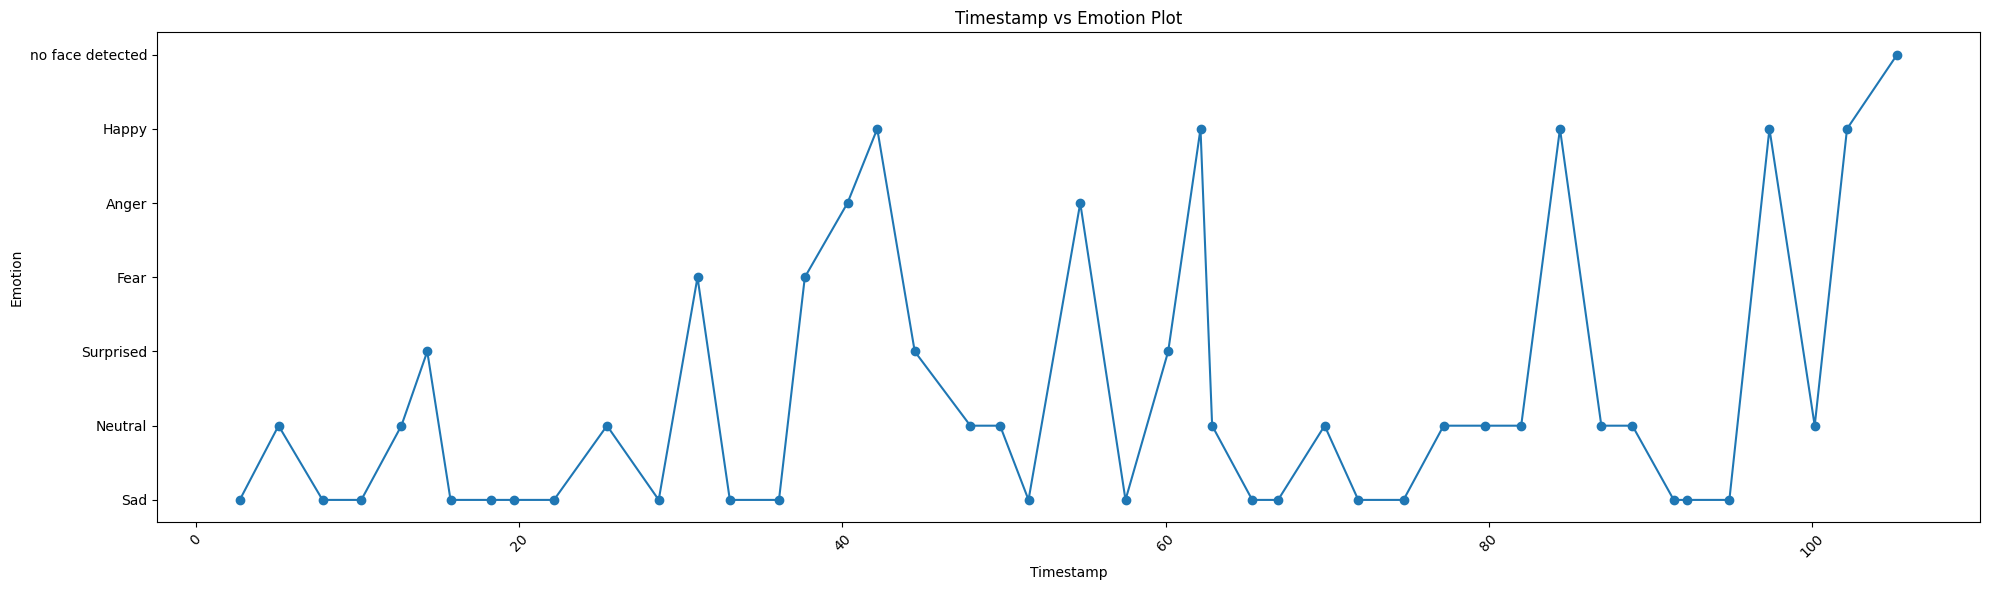

In [6]:
# Plot the graph

plt.figure(figsize=(20, 6))
plt.plot(timestamps, t_emotions, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Emotion')
plt.title('Timestamp vs Emotion Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
data.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


As this is a problem of natural language processing, I’ll start by tokenizing the data:

In [10]:
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]

# Get unique emotions
unique_emotions = data['Emotions'].unique()

# Convert the result to a list
emotion_list = list(unique_emotions)

# Print or use the list as needed
print(emotion_list)

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [11]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)


Now we need to pad the sequences to the same length to feed them into a neural network. Here’s how we can pad the sequences of the texts to have the same length:

In [12]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

Now I’ll use the label encoder method to convert the classes from strings to a numerical representation:

In [13]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

We are now going to One-hot encode the labels. One hot encoding refers to the transformation of categorical labels into a binary representation where each label is represented as a vector of all zeros except a single 1. This is necessary because machine learning algorithms work with numerical data. So here is how we can One-hot encode the labels:

In [14]:
# One-hot encode the labels
one_hot_labels = keras.utils.to_categorical(labels)

## Text Emotions Classification Model
Now we will split the data into training and test sets:

In [15]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, 
                                                one_hot_labels, 
                                                test_size=0.2)

Now let’s define a neural network architecture for our classification problem and use it to train a model to classify emotions:

In [16]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=15, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/15


/home/asad/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


199/400 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3368 - loss: 1.5970

KeyboardInterrupt: 

Now let’s take a sentence as an input text and see how the model performs:

In [ ]:
model_architecture = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_architecture)

model.save("model_weights.h5")

In [ ]:
input_text = "wow, you are so beautiful"

# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label)

So this is how you can use Machine Learning for the task of text emotion classification using the Python programming language.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pickle

# Load the model
# model = load_model("model_weights.h5")


# Define the maximum length for padding sequences
max_length = 66  # Set it to the input shape of your model

# Read transcript from transcript.txt
transcript_file_path = 'transcript.txt'
with open(transcript_file_path, 'r') as file:
    transcript = file.read()

# Extract timestamps and corresponding text
timestamps_and_texts = [line.split('] ') for line in transcript.split('\n') if line.strip()]
timestamps, texts = zip(*timestamps_and_texts)

# Perform emotion analysis for each timestamp
predicted_labels = []

for text in texts:
    # Preprocess the input text
    input_text = text.strip()
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)

    # Predict emotion
    prediction = model.predict(padded_input_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])

    # Append predicted label to the list
    predicted_labels.append(predicted_label[0])




In [ ]:
# Map numeric labels back to emotion names
# emotion_names = label_encoder.inverse_transform(np.unique(labels))

# Plot Timestamp vs Emotion
plt.figure(figsize=(20, 6))
plt.plot(timestamps, predicted_labels, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Emotion')
plt.title('Timestamp vs Emotion Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame
data = {'TimeStamps': timestamps_mapped,
        'Emotion in video': t_emotions,
        'Words Emotion': predicted_labels}

df = pd.DataFrame(data)

# Replace values in the 'Words Emotion' column
# replace_dict = {
#     'sadness': 'Sad',
#     'joy': 'Happy',
#     'anger': 'Anger',
#     'love': 'Happy',
#     'fear': 'Fear',
#     'surprise': 'Surprised'
# }
# df['Words Emotion'] = df['Words Emotion'].replace(replace_dict)

# Change all values in 'Words Emotion' column to the same dtype and add 'Yes' or 'No'
df['Words Emotion'] = df['Words Emotion'].astype(str)
df['match'] = ['Yes' if ((emotion == 'Sad' and (label== 'sadness' or label=='fear' or label=='anger')) or (emotion == 'Happy' and (label== 'love' or label=='joy' or label=='surprise')) or (emotion == 'Fear' and  (label== 'sadness'))) else 'No' for emotion, label in zip(t_emotions, df['Words Emotion'])]

# Print the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)


In [ ]:
import pandas as pd

# Create a DataFrame
data = {'TimeStamps': timestamps_mapped,
        'Emotion in video': t_emotions,
        'Words Emotion': predicted_labels}

df = pd.DataFrame(data)

# Replace values in the 'Words Emotion' column
replace_dict = {
    'sadness': 'Sad',
    'joy': 'Happy',
    'anger': 'Anger',
    'love': 'Happy',
    'fear': 'Fear',
    'surprise': 'Surprised'
}
df['Words Emotion'] = df['Words Emotion'].replace(replace_dict)

# Change all values in 'Words Emotion' column to the same dtype and add 'Yes' or 'No'
df['Words Emotion'] = df['Words Emotion'].astype(str)
df['match'] = ['Yes' if emotion == label else 'No' for emotion, label in zip(t_emotions, df['Words Emotion'])]

# Print the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv('output1.csv', index=False)
